## Clustering : K-means Clustering

Clustering is an unsupervised learning algorithm. Here the given data is not labled and we try to group up the data items into clusters, such that items in one cluster are similar to each other, and dissimilar to items on other clusters. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
np.random.seed(12)
%matplotlib inline

In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


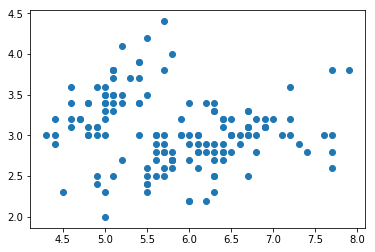

In [3]:
X = np.array(iris[['sepal_length' , 'sepal_width']])
plt.scatter(X[:,0], X[:,1])
plt.show()

In [49]:
n = X.shape[0]
n_clusters = 2
cluster_centroids = np.array([ X[0,:] , X[9,:] ])
assigned_cluster = np.array([-1]*n)
distances = np.array([100000000.0]*n)

In [50]:
print X.shape
print cluster_centroids.shape

(150, 2)
(2, 2)


In [61]:
for i in range(n):
    for j in range(n_clusters):
        dist = math.sqrt( (X[i,0]-cluster_centroids[j,0])**2 + (X[i,1]-cluster_centroids[j,1])**2 )
        if(dist < distances[i]):
            distances[i] = dist
            assigned_cluster[i] = j

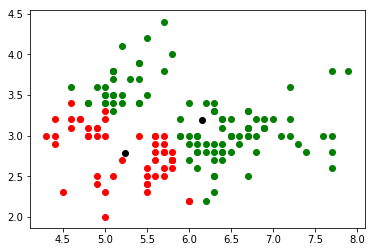

In [62]:
plt.scatter((X[assigned_cluster==1])[:,0] , (X[assigned_cluster==1])[:,1], color = 'r')
plt.scatter((X[assigned_cluster==0])[:,0] , (X[assigned_cluster==0])[:,1], color = 'g')

plt.scatter(cluster_centroids[0,0] , cluster_centroids[0,1], color='black')
plt.scatter(cluster_centroids[1,0] , cluster_centroids[1,1], color='black')

In [63]:
for i in range(n_clusters):
    cluster_centroids[i,0] = np.mean(X[assigned_cluster==i][:,0])
    cluster_centroids[i,1] = np.mean(X[assigned_cluster==i][:,1])

In [54]:
z = np.random.randint(0,n-1, n_clusters)
x = [X[i,:] for i in z]
x

[array([ 6.6,  3. ]), array([ 6.1,  2.6])]

In [66]:
def cluster_2d(X, n_clusters, plot=True, verbose=True, iterations = 100):
    n = X.shape[0]
    random_indexes = np.random.randint(0,n-1, n_clusters)
    cluster_centroids = np.array([ X[z,:] for z in random_indexes ])
    assigned_cluster = np.array([-1]*n)
    distances = np.array([100000000.0]*n)
    for _ in range(iterations):
        for i in range(n):
            for j in range(n_clusters):
                dist = math.sqrt( (X[i,0]-cluster_centroids[j,0])**2 + (X[i,1]-cluster_centroids[j,1])**2 )
                if(dist < distances[i]):
                    distances[i] = dist
                    assigned_cluster[i] = j
        for i in range(n_clusters):
            cluster_centroids[i,0] = np.mean(X[assigned_cluster==i][:,0])
            cluster_centroids[i,1] = np.mean(X[assigned_cluster==i][:,1])
    colors = ['r' , 'g' , 'b' , 'c' , 'y']
    for i in range(n_clusters):
        plt.scatter((X[assigned_cluster==i])[:,0] , (X[assigned_cluster==i])[:,1], color = colors[i%5])
        plt.scatter(cluster_centroids[i,0] , cluster_centroids[i,1], color='black')
    return assigned_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

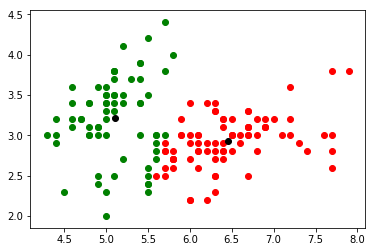

In [67]:
cluster_2d(X, 2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

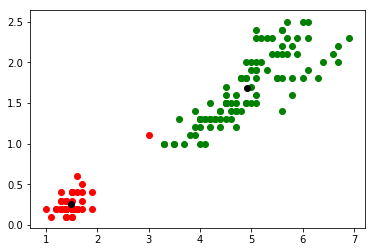

In [165]:
cluster_2d(np.array(iris[ ['petal_length' , 'petal_width'] ]), 2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

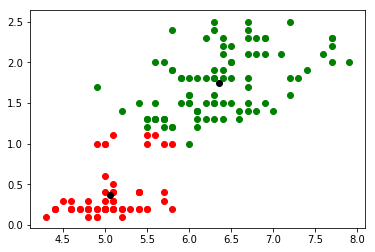

In [167]:
cluster_2d(np.array(iris[ ['sepal_length' , 'petal_width'] ]), 2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

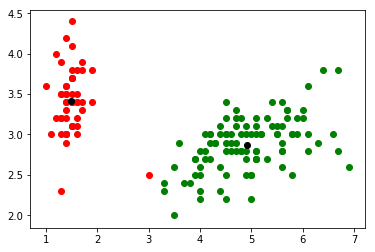

In [168]:
cluster_2d(np.array(iris[ ['petal_length' , 'sepal_width'] ]), 2)